<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Geospatial/geomorphometric_anlysis_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geomorphometric Analysis with WhiteboxTools in R

Zia Ahmed, University at Buffalo

The whitebox R package is built on **WhiteboxTools**, an advanced geospatial data analysis platform developed by Prof. John Lindsay ([webpage](https://jblindsay.github.io/ghrg/index.html); [jblindsay](https://github.com/jblindsay)) at the University of Guelph's [Geomorphometry and Hydrogeomatics Research Group](https:/.github.io/ghrg/index.html). *WhiteboxTools* can be used to perform common geographical information systems (GIS) analysis operations, such as cost-distance analysis, distance buffering, and raster reclassification. Remote sensing and image processing tasks include image enhancement (e.g. panchromatic sharpening, contrast adjustments), image mosaicing, numerous filtering operations, simple classification (k-means), and common image transformations. *WhiteboxTools* also contains advanced tooling for spatial hydrological analysis (e.g. flow-accumulation, watershed delineation, stream network analysis, sink removal), terrain analysis (e.g. common terrain indices such as slope, curvatures, wetness index, hillshading; hypsometric analysis; multi-scale topographic position analysis), and LiDAR data processing. LiDAR point clouds can be interrogated (LidarInfo, LidarHistogram), segmented, tiled and joined, analyzed for outliers, interpolated to rasters (DEMs, intensity images), and ground-points can be classified or filtered. *WhiteboxTools* is not a cartographic or spatial data visualization package; instead it is meant to serve as an analytical backend for other data visualization software, mainly GIS. Suggested citation: Lindsay, J. B. (2016). Whitebox GAT: A case study in geomorphometric analysis. *Computers & Geosciences*, 95, 75-84. doi: <http://dx.doi.org/10.1016/j.cageo.2016.07.003>

### Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install Packages

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf',
                   'rgeos' 'tidyverse', 'terra', 'devtools',
                   'classInt', 'RColorBrewer', 'spatialEco', 'gridExtra', 'rasterVis', lib='drive/My Drive/R/')

In [ ]:
%%R
install.packages('tmap', lib='drive/My Drive/R/')

### Install whiteboxR package

In [ ]:
%%R
devtools::install_github("giswqs/whiteboxR", lib='drive/My Drive/R/')

### Installing WhiteboxTools

The quickest way to get started if you are on 64-bit Windows, Linux or MacOS architectures is to download and install the 'WhiteboxTools' binary.

A method install_whitebox() is provided to download a version of the binaries that corresponds to the wrapper functions available in the package.

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(whitebox)
whitebox::install_whitebox()

In [ ]:
%%R
wbt_init()

### Load other packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library (terra)
library(sf)
library (rgdal)
library(tidyverse)
library(classInt)
library(RColorBrewer)
library(raster)
library(gridExtra)
library(rasterVis)
library(tmap)

### Data
.
We will use 30 M SRTM elevation one small area in Bandarban district, Bangladesh and the data can be found [here](https://github.com/zia207/r-colab/tree/main/Data/) for download.

In [ ]:
%%R
# Input
dem <- "/content/drive/MyDrive/Data/Bangladesh/Raster/aoi_dtm_dem_BTM.tif"
dem

[1] "/content/drive/MyDrive/Data/Bangladesh/Raster/aoi_dtm_dem_BTM.tif"


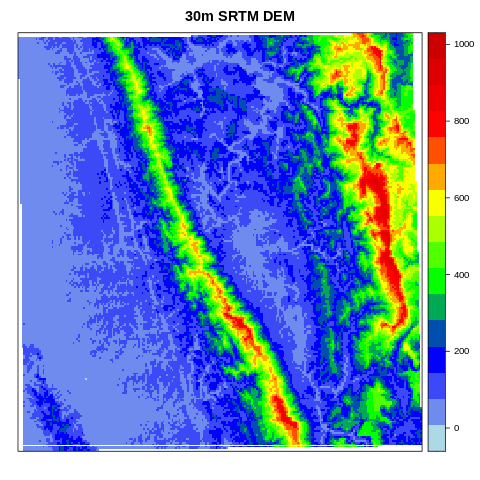

In [ ]:
%%R
rgb.palette <- colorRampPalette(c('lightblue',"blue","green","yellow","red", "red3"),
space = "rgb")
dem_ras <- terra::rast(dem)
spplot(dem_ras,  main="30m SRTM DEM", col.regions=rgb.palette(100))


### Slope

This tool calculates slope gradient (i.e. slope steepness in degrees, radians, or percent) for each grid cell in an input digital elevation model (DEM). The user must specify the name of the input DEM (`--dem`) and the output raster image. The *Z conversion factor* is only important when the vertical and horizontal units are not the same in the DEM. When this is the case, the algorithm will multiply each elevation in the DEM by the Z conversion factor.

#### Slope - degree

In [ ]:
%%R
slope.degree <- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/slope_deg.tif"
# calculate  slope degree
wbt_slope(dem, slope.degree, units = 'degrees')
# convert to terra raster
slope.degree_ras <- terra::rast(slope.degree)
# plot
p1=spplot(slope.degree_ras,
        main= "Slope (Degree)",
        col.regions=rgb.palette(100))

slope - Elapsed Time (excluding I/O): 0.596s


#### Slope Percent

In [ ]:
%%R
# define output
slope.percent <- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/slope_percent.tif"
# calculate percent slope
wbt_slope(dem, slope.percent, units = 'percent')
# convert to terra raster
slope.percent_ras <- terra::rast(slope.percent)
# plot
p2=spplot(slope.percent_ras,
        main= "Slope (Percent)",
        col.regions=rgb.palette(100))

slope - Elapsed Time (excluding I/O): 0.593s


#### Slope - radins

In [ ]:
%%R
# define output
slope.radians <- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/slope_radians.tif"
# calculate slope - radians
wbt_slope(dem, slope.radians, units = 'radians')
# convert to terra raster
slope.radians_ras <- terra::rast(slope.radians)
# plot
p3=spplot(slope.radians_ras,
        main= "Slope (Radians)",
        col.regions=rgb.palette(100))

slope - Elapsed Time (excluding I/O): 1.77s


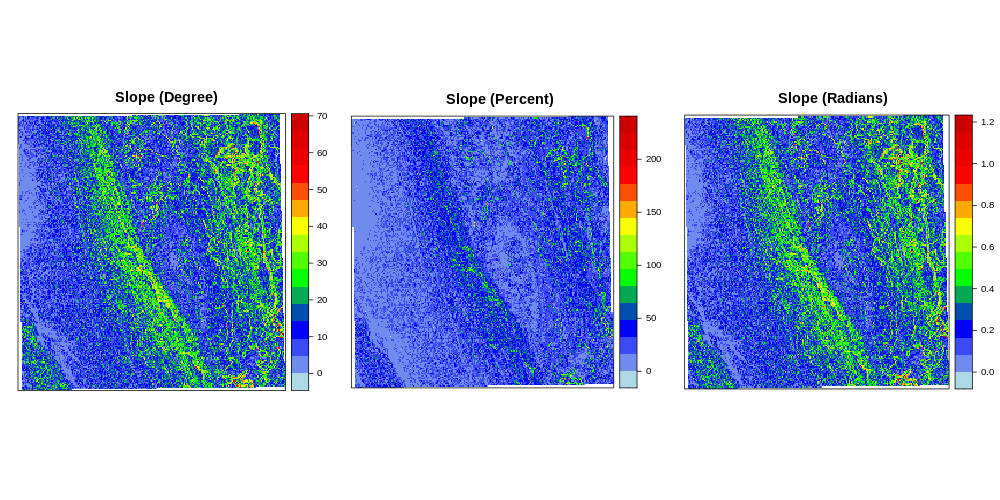

In [ ]:
%%R  -w 1000 -h 500 -u px
gridExtra::grid.arrange(p1,p2,p3, ncol=3)

### Aspect

This tool calculates slope aspect (i.e. slope orientation in degrees clockwise from north) for each grid cell in an input digital elevation model (DEM).

In [ ]:
%%R
# define output
aspect <- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/aspect.tif"
# calculate aspect
wbt_aspect(dem, aspect)
# convert to terra raster
aspect_ras <- terra::rast(aspect)

aspect - Elapsed Time (excluding I/O): 0.667s


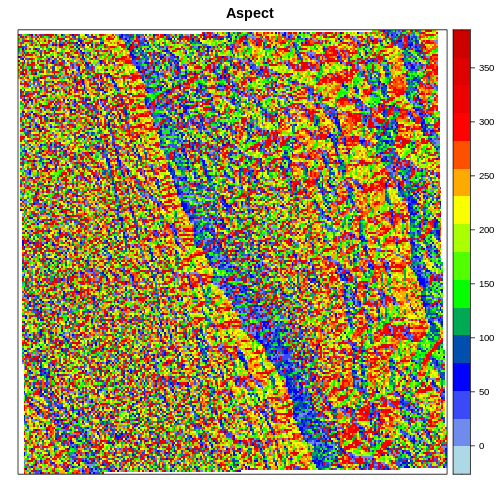

In [ ]:
%%R -w 500 -h 500 -u px
spplot(aspect_ras,
        main= "Aspect",
        col.regions=rgb.palette(100))

### Hillshade

This tool performs a hillshade operation (also called shaded relief) on an input digital elevation model (DEM). The user must specify the name of the input DEM and the output hillshade image name.


In [ ]:
%%R
# define output
hillshade <- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/hillshade.tif"
# calculate hillshade
wbt_hillshade(dem, hillshade, azimuth=315.0, altitude=30.0 )
# convert to terra raster
hillshade_ras <- terra::rast(hillshade)

hillshade - Elapsed Time (excluding I/O): 0.732s


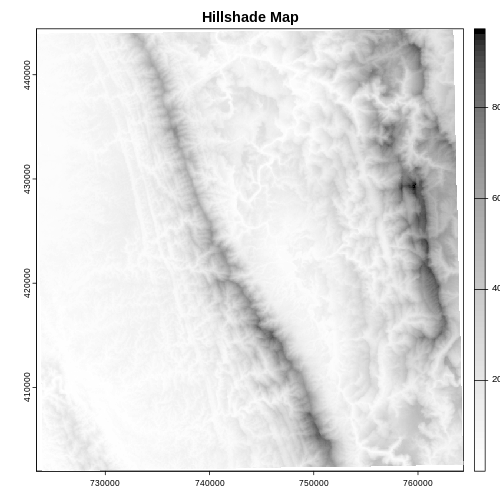

In [ ]:
%%R -w 500 -h 500 -u px
plot(hillshade_ras,col = gray.colors(20, start =1, end = 0), legend=FALSE, main='Hillshade Map')
plot(dem_ras, col = gray.colors(80, start =1, end = 0), add=TRUE)

### Ruggedness Index

The terrain ruggedness index (TRI) is a measure of local topographic relief. The TRI calculates the root-mean-square-deviation (RMSD) for each grid cell in a digital elevation model (DEM), calculating the residuals (i.e. elevation differences) between a grid cell and its eight neighbours.


In [ ]:
%%R
# define output
ruggedness<- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/ruggedness.tif"
# calculate ruggedness
wbt_ruggedness_index(dem, ruggedness)
# convert to terra raster
ruggedness_ras <- terra::rast(ruggedness)

ruggedness_index - Elapsed Time (excluding I/O): 0.122s


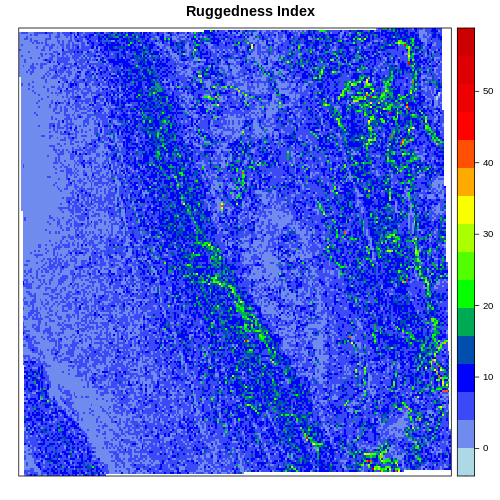

In [ ]:
%%R -w 500 -h 500 -u px
spplot(ruggedness_ras,
        main= "Ruggedness Index",
        col.regions=rgb.palette(100))

### Curveture

Curvature, in the context of geomorphometry and geography, refers to a fundamental geomorphic attribute that describes the rate of change of slope or the bending of the Earth's surface at a specific point. It provides information about the shape and morphology of landforms, helping researchers understand the local surface characteristics and terrain features.

#### Profile Curvature

This tool calculates the profile (or vertical) curvature, or the rate of change in slope along a flow line, from a digital elevation model (DEM). It is the curvature of a normal section having a common tangent line with a slope line at a given point on the surface (Florinsky, 2017). This variable has an unbounded range that can take either positive or negative values. Positive values of the index are indicative of flow acceleration while negative profile curvature values indicate flow deceleration. Profile curvature is measured in units of m-1.

In [ ]:
%%R
# define output
profile_curvature<- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/profile_curvature.tif"
# calculate profile curvature
wbt_profile_curvature(dem, profile_curvature, log= TRUE)
# convert to terra raster
profile_curvature_ras <- terra::rast(profile_curvature)

profile_curvature - Elapsed Time (excluding I/O): 1.246s


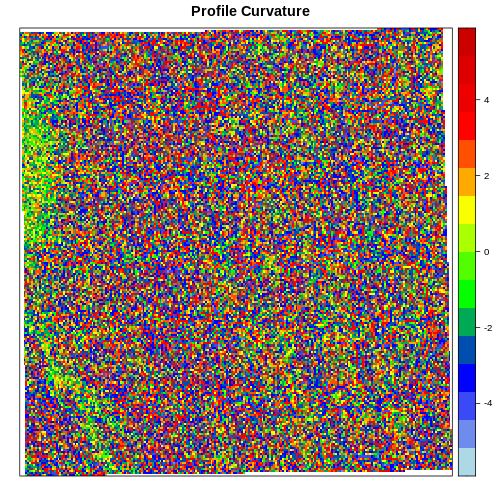

In [ ]:
%%R -w 500 -h 500 -u px
spplot(profile_curvature_ras,
        main= "Profile Curvature",
        col.regions=rgb.palette(100))

#### Plan Curvature

This tool calculates the plan (or contour) curvature from a digital elevation model (DEM). Plan curvature is the curvature of a contour line at a given point on the topographic surface (Florinsky, 2017). This variable has an unbounded range that can take either positive or negative values. Positive values of the index are indicative of flow divergence while negative plan curvature values indicate flow convergence. Thus plan curvature is similar to tangential curvature, although the literature suggests that the latter is more numerically stable (Wilson, 2018). Plan curvature is measured in units of m-1.

In [ ]:
%%R
# define output
plan_curvature<- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/plan_curvature.tif"
# calculate plan curvature
wbt_plan_curvature(dem, plan_curvature, log= TRUE)
# convert to terra raster
plan_curvature_ras <- terra::rast(plan_curvature)

plan_curvature - Elapsed Time (excluding I/O): 1.202s


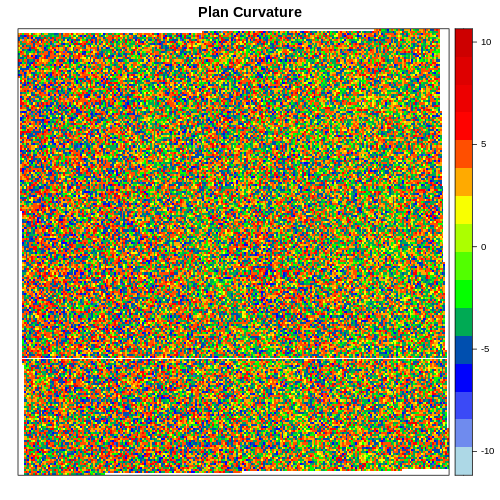

In [ ]:
%%R -w 500 -h 500 -u px
spplot(plan_curvature_ras,
        main= "Plan Curvature",
        col.regions=rgb.palette(100))

#### Total Curvature

This tool calculates the total curvature from a digital elevation model (DEM). Total curvature measures the curvature of the topographic surface rather than the curvature of a line across the surface in some direction (Wilson, 2018). Total curvature can be positive or negative, with zero curvature indicating that the surface is either flat or the convexity in one direction is balanced by the concavity in another direction, as would occur at a saddle point. Total curvature is measured in units of m-1.

In [ ]:
%%R
# define output
total_curvature<- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/total_curvature.tif"
# calculate total_curvature
wbt_total_curvature(dem, total_curvature, log= TRUE)
# convert to terra raster
total_curvature_ras <- terra::rast(total_curvature)

total_curvature - Elapsed Time (excluding I/O): 0.628s


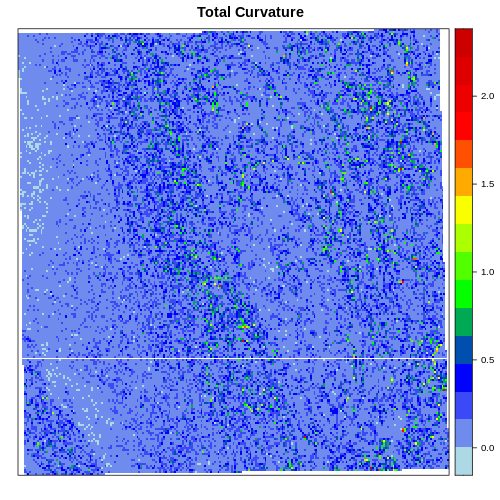

In [ ]:
%%R -w 500 -h 500 -u px
spplot(total_curvature_ras,
        main= "Total Curvature",
        col.regions=rgb.palette(100))

#### Tangential Curvature

This tool calculates the tangential (or horizontal) curvature, which is the curvature of an inclined plane perpendicular to both the direction of flow and the surface (Gallant and Wilson, 2000). Alternatively, it could be described as the curvature of a normal section tangential to a contour line at a given point of the topographic surface (Florinsky, 2017). This variable has an unbounded range that can be either positive or negative. Positive values are indicative of flow divergence while negative tangential curvature values indicate flow convergence. Thus tangential curvature is similar to plan curvature, although the literature suggests that the former is more numerically stable (Wilson, 2018). Tangential curvature is measured in units of m-1.

In [ ]:
%%R
# define output
tangential_curvature<- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/tangential_curvature.tif"
# calculate plan curvature
wbt_tangential_curvature(dem, tangential_curvature, log= TRUE)
# convert to terra raster
tangential_curvature_ras <- terra::rast(tangential_curvature)

tangential_curvature - Elapsed Time (excluding I/O): 0.651s


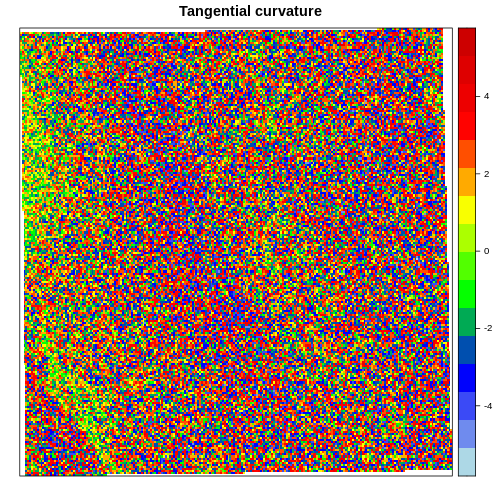

In [ ]:
%%R -w 500 -h 500 -u px
spplot(tangential_curvature_ras,
        main= "Tangential curvature",
        col.regions=rgb.palette(100))

#### Gaussian Curvature

This tool calculates the Gaussian curvature from a digital elevation model (DEM). Gaussian curvature is the product of maximal and minimal curvatures, and retains values in each point of the topographic surface after its bending without breaking, stretching, and compressing (Florinsky, 2017). Gaussian curvature is measured in units of m-2.


In [ ]:
%%R
# define output
gaussian_curvature<- "/content/drive/MyDrive/Data/Bangladesh/Raster/Geomorph/gaussian_curvature.tif"
# calculate plan curvature
wbt_gaussian_curvature(dem, gaussian_curvature)
# convert to terra raster
gaussian_curvature_ras <- terra::rast(gaussian_curvature)

gaussian_curvature - Elapsed Time (excluding I/O): 0.602s


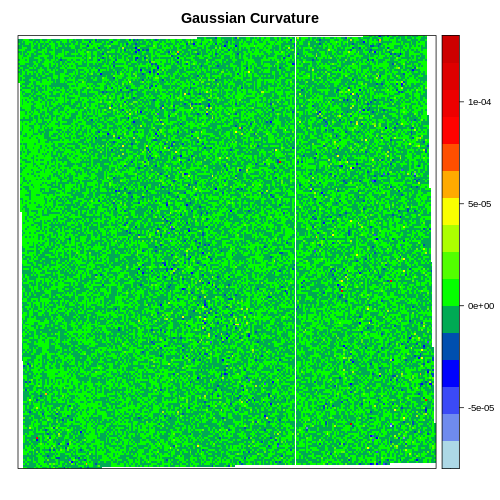

In [ ]:
%%R -w 500 -h 500 -u px
spplot(gaussian_curvature_ras,
        main= "Gaussian Curvature",
        col.regions=rgb.palette(100))


### Further Reading

1.  [Geomorphometric Analysis](https://www.whiteboxgeo.com/manual/wbt_book/available_tools/geomorphometric_analysis.html)